In [1]:
!git clone https://github.com/srq0617/hanul.git

Cloning into 'hanul'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 13180 (delta 25), reused 77 (delta 12), pack-reused 13088
Receiving objects: 100% (13180/13180), 1.84 GiB | 36.82 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Checking out files: 100% (15973/15973), done.


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.Session(config=config)
from keras import optimizers
import glob
import cv2
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, BatchNormalization
from keras.models import load_model
from numpy import argmax
from skimage import measure
np.random.seed(111)

Using TensorFlow backend.


**테스트 이미지 경로 설정**

In [4]:
test_path=r'./hanul'
test_input_path = os.path.join(test_path,'low 2000')

test = sorted(glob.glob(os.path.join(test_input_path,'sample (740).png')))

print("Total number of samples in the test set: ", len(test))

Total number of samples in the test set:  1


**웨이트값 불러오기**

In [5]:
model = load_model(r'./hanul/weight/epoch 1.h5')

In [6]:
test_list=[]
for img in test:
    img = load_img(img, grayscale=True, target_size=(512,512))
    img = img_to_array(img).astype('float32')/255.
    test_list.append(img)

test_list = np.array(test_list)

print("shape of test_list", test_list.shape)

shape of test_list (1, 512, 512, 1)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
predicted_list = []
for img in test_list:
    img = np.reshape(img, (1, 512, 512, 1))
    
    
    predicted = np.squeeze(model.predict(img, batch_size=1)) # 각 모델의 prediction을 predictions 리스트에 저장
    predicted_list.append(predicted)

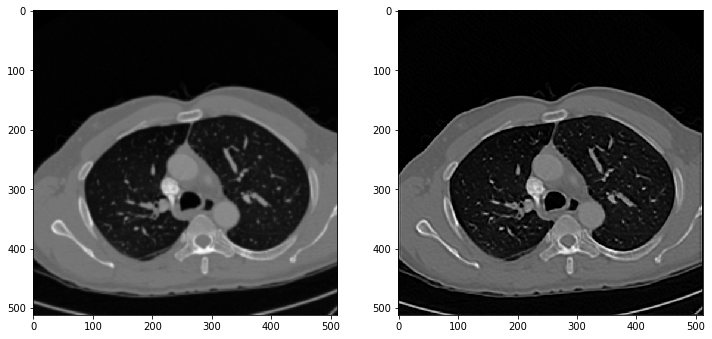

In [8]:
_, ax = plt.subplots(1,2, figsize=(12,9.338))
ax[0].imshow(np.squeeze(test_list[0]), cmap='gray') # 1열에 원본 이미지
ax[1].imshow(np.squeeze(predicted_list[0].astype('float32')), cmap='gray') # 2열에 LR to SR 이미지
plt.show()

**이미지 저장(gdrive)**

In [0]:
#os.chdir('/content/gdrive/My Drive/result image(png)')
#predicted_list[0] = cv2.cvtColor(predicted_list[0], cv2.COLOR_BGR2GRAY)
#cv2.imwrite('epoch 1.png',predicted_list[0].astype('float32'))

**ssim, psnr 측정**

In [0]:
def mse(imageA, imageB):
  err = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
  err /= float(imageA.shape[0] * imageA.shape[1])

  return err

def compare_images(imageA, imageB, title):
  m = mse(imageA, imageB)
  s = measure.compare_ssim(imageA, imageB)
  p = measure.compare_psnr(imageA, imageB)

  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f, PNSR: %.2f" % (m, s, p))

  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  plt.show()

In [12]:
original = cv2.imread(r'./hanul/clean 2000/sample (740).png')
#contrast = cv2.imread(r'./hanul/low 2000/sample (740).png')
#contrast = cv2.imread(r'./hanul/result image/epoch 1.tif')
#contrast = cv2.imread('/content/gdrive/My Drive/result image(png)/epoch 1.png')
contrast = predicted_list[0]

print(original, "original")
print(contrast, "contrast")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)

error: ignored

In [0]:
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast)

for (i, (name, image)) in enumerate(images):
  ax = fig.add_subplot(1, 3, i + 1)
  ax. set_title(name)
  plt.imshow(image, cmap = plt.cm.gray)
  plt.axis("off")

plt.show()

compare_images(original, contrast, "Original vs. Contrast")